# Horror Movie Metadata

### Author: Jose S. Lopez

#### Setup

In [2]:
install.packages('lubridate')
install.packages('tidytext')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [4]:
library('tidyverse')
library('tidytext')
library('ggrepel')
library('scales')

In [5]:
hm_data_raw <- read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-10-22/horror_movies.csv",
                     col_types=cols())

In [6]:
options(warn=-1)

hm_data <- hm_data_raw %>% 
           filter(!is.na(review_rating), # Subset to keep data with a review rating
                  !is.na(budget), # Subset to keep data with a budget value
                  grepl("\\$", budget), # Budget must be in US dollars
                  release_country == "USA") %>% # Movie's main release country must be the USA
           mutate(release_date = parse_date(release_date, format = "%d-%b-%y",
                                            locale = locale("en")),
                  budget = parse_number(budget),
                  month = format(release_date, "%b")) %>%
           extract(title, "year", "\\((\\d\\d\\d\\d)\\)", remove = FALSE, convert=TRUE)

options(warn=1)

In [7]:
# Will be used for factor relevel

months = c('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

The data explored is derived from the Internet Movie Database (IMDb) that was put on Kaggle and then hosted https://github.com/rfordatascience/tidytuesday where I sourced the data from. The original data set contains 3,328 different horror movies for which there are 12 variables including genre(s), release date, release country, and movie run time (in minutes). The majority of horror movies in the data set are from 2012 and on, but there are no movies beyond the year 2017. Prior to using the data to create exploratory figures we remove all observations that do not have a review rating value and budget value. In order to keep our visualizations with regards to the budget of horror movies interpretable we keep only movies that are in US dollars and were released in the USA. We are left with 678 observations.

#### Here we are forming an idea of the distribution of the horror movie budgets in the USA prior to 2018.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



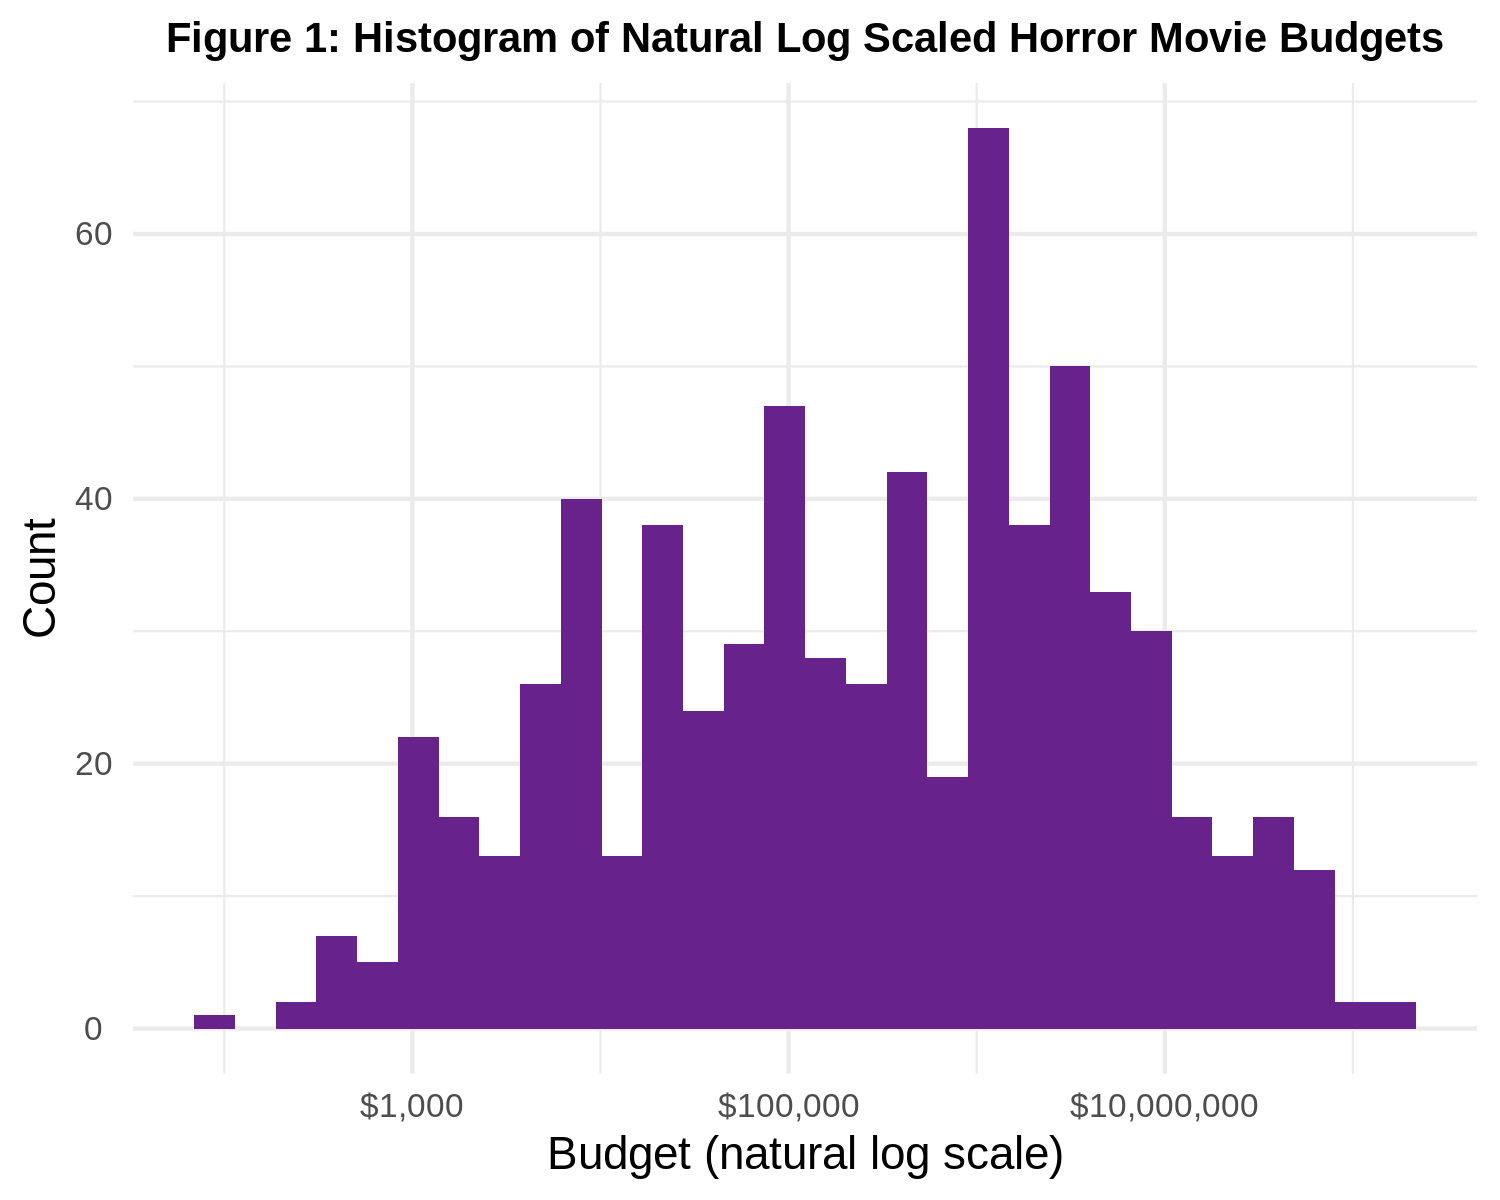

In [8]:
hm_data %>%
  ggplot(aes(budget)) + 
  geom_histogram(fill = 'darkorchid4') +
  scale_x_log10(labels = scales::dollar) +
  labs(x = "Budget (natural log scale)", y = "Count") +
  ggtitle("Figure 1: Histogram of Natural Log Scaled Horror Movie Budgets") +
  theme_minimal() +
  theme(axis.text.x = element_text(size = 8, hjust = 0.5),
        axis.text.y = element_text(size = 8, hjust = 0.5),
        plot.title = element_text(size = 10, hjust = 0.5, face = "bold"))


#### Here  we are forming an idea of the distribution of the horror movies for each month in the USA prior to 2018.

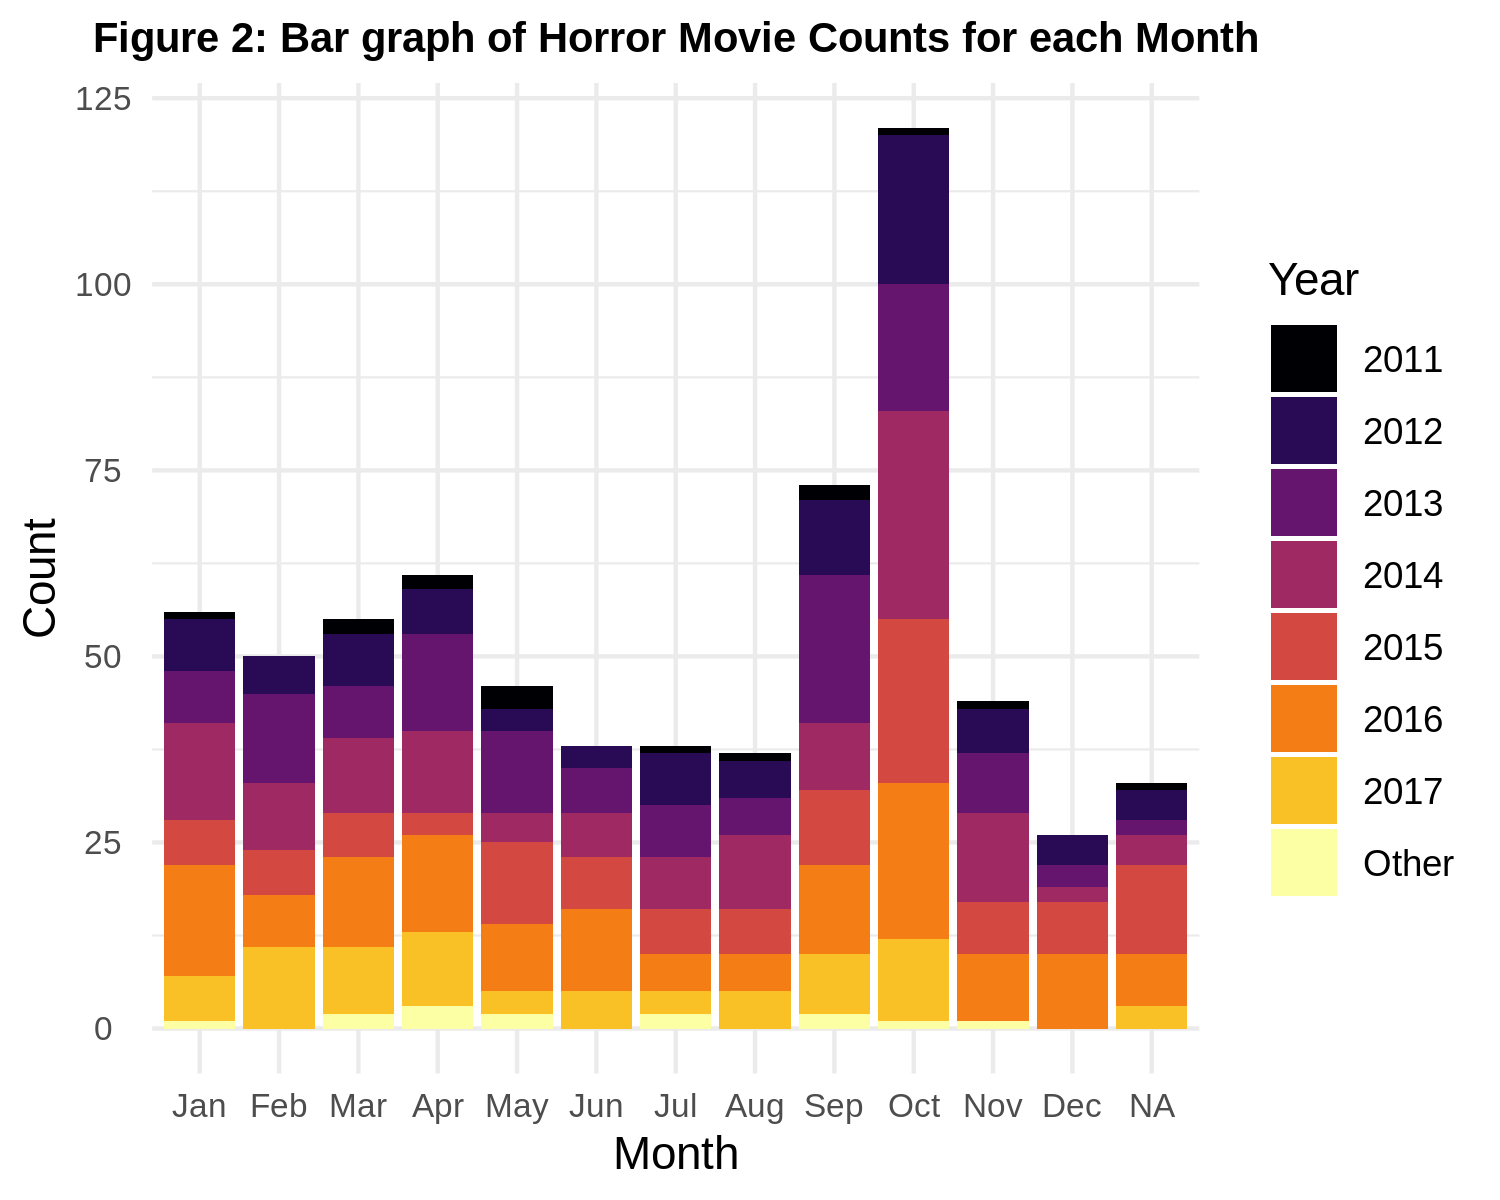

In [9]:
hm_data_lumped <- hm_data %>%
                  mutate(year_lumped = as.factor(year) %>% fct_lump(n = 7),
                         month = fct_relevel(month, months))

hm_data_lumped %>%
  ggplot(aes(x = month, fill = year_lumped)) + 
  geom_bar() +
  labs(x = "Month", y = "Count", fill = "Year") +
  ggtitle("Figure 2: Bar graph of Horror Movie Counts for each Month") +
  scale_fill_viridis_d(option="inferno") +
  theme_minimal() +
  theme(axis.text.x = element_text(size = 8, hjust = 0.5),
        axis.text.y = element_text(size = 8, hjust = 0.5),
        plot.title = element_text(size = 10, hjust = 0.5, face = "bold"))


In the above two figures we look at the distribution of the movie budgets and the count of movies released each month. For the budget histogram we looked at the budgets on a natural log scale which is often used when looking at large sums of money. What we see is not exactly a normal distribution but more skewed to the left. Regarding the bar graph for the number of movies released each month it is as expected, October has the most horror movies for all the years represented by the data set. It is easily distinguishable that for each individual year there was more horror movies during the month of October, although in the year of 2013 it seems that the horror movies in September are comparable.

#### To follow we create a figure to form an idea of whether there is a correlation between a horror movie's budget and its review rating.

In [10]:
# fitler data set to get data to be highlighted in the plot
highlight_f2_1 <- hm_data %>%
                  filter(review_rating > 9)

titles_f2_1 <- highlight_f2_1 %>% select(month, title, review_rating, budget)

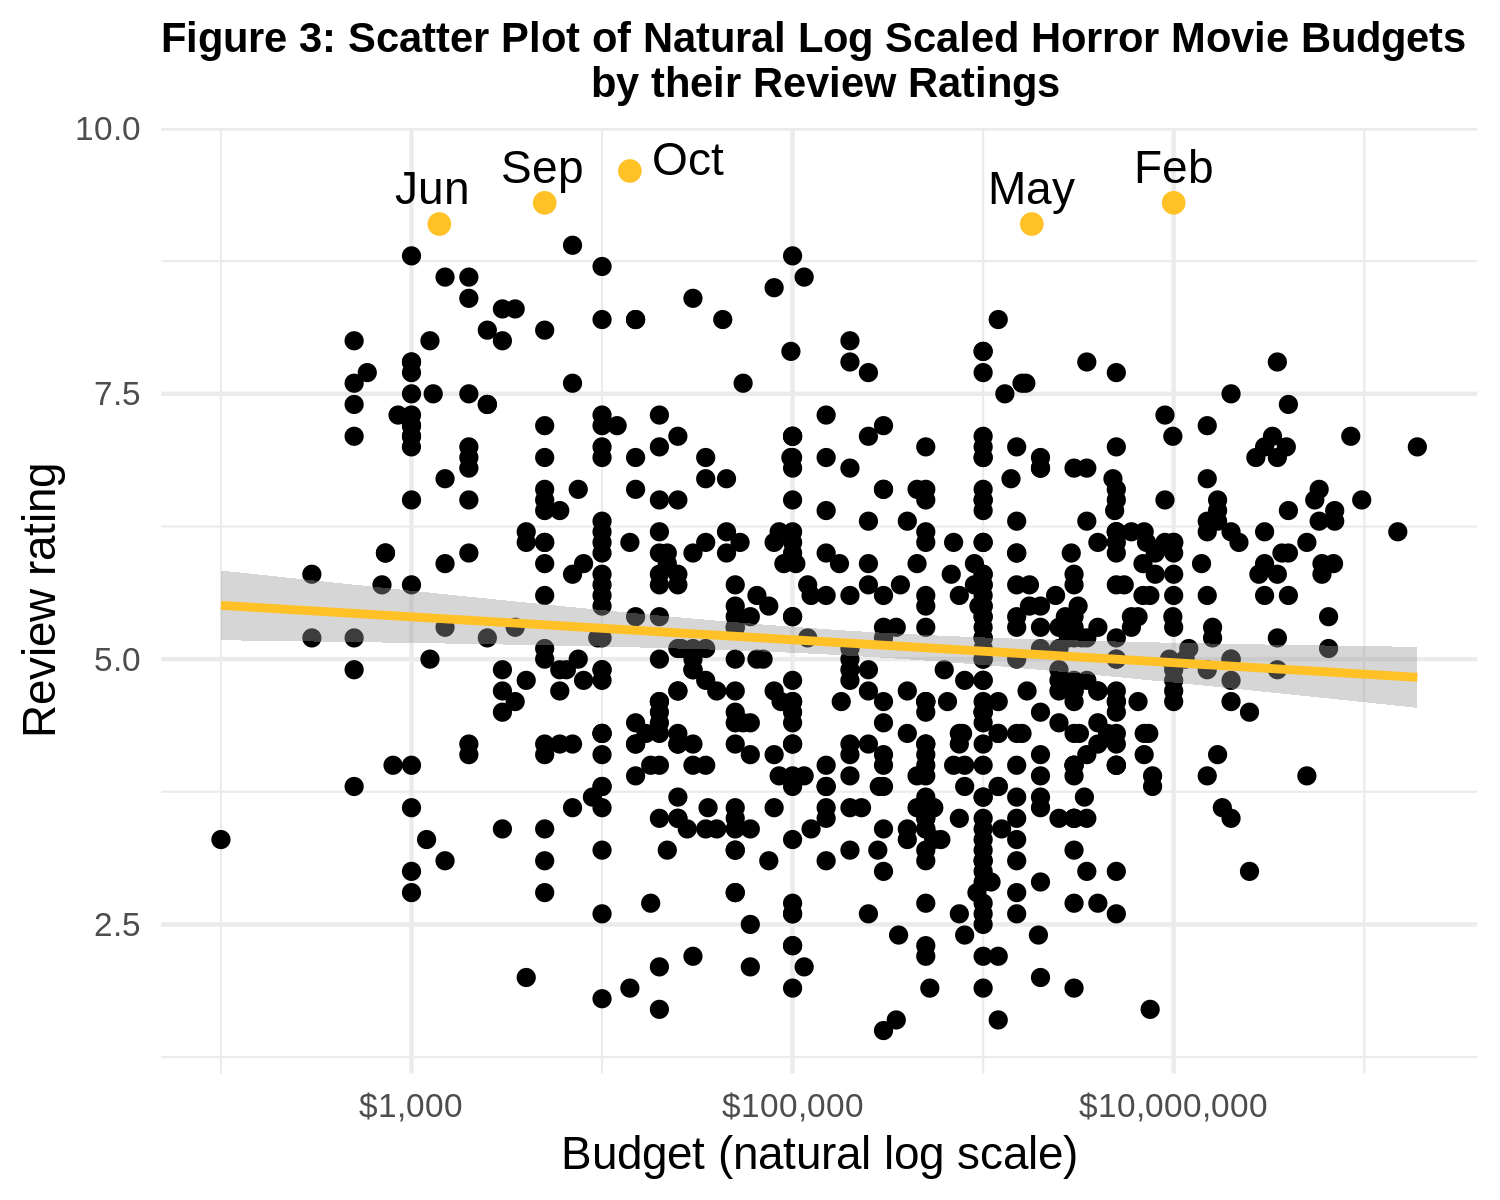

In [11]:
hm_data %>%
  ggplot(aes(x = budget, y = review_rating, label = month)) +
  geom_point() +
  scale_x_log10(labels = scales::dollar) +
  geom_smooth(formula = y ~ x, method = "lm", color = "goldenrod1") +
  geom_point(data = highlight_f2_1,
             aes(x = budget, y = review_rating),
             color = 'goldenrod1',
             size = 2) +
  geom_text_repel(data = highlight_f2_1,
                  nudge_y = .2,
                  point.padding = .5) +
  theme_minimal() +
  labs(title = "Figure 3: Scatter Plot of Natural Log Scaled Horror Movie Budgets \n by their Review Ratings",
       x = "Budget (natural log scale)",
       y = "Review rating") +
  theme(axis.text = element_text(size = 8, hjust = 0.5),
        plot.title = element_text(size = 10, hjust = 0.5, face = "bold"))

There seems to be no correlation between a horror movie's budget and its review rating. This is plausible in that a lot of indie horror films have much smaller budgets and often times can become critically acclaimed or cult classics. Further, investigation would have to be done on whether IMDb has weighted review ratings. From the plot we can make an inference about there being no correlation between the budget and review rating but it would also be interesting to explore how many individuals are reviewing the smaller budget horror movies as opposed to larger budget horror movies. Smaller groups of individuals that like horror movies are likely to seek out smaller budget horror films and may be biased towards giving some horror movies better reviews as opposed to larger budget horror films who capture more reviews and more individuals who may not be partial to horror films. The corresponding table of the top rated horror films are provided below and I myself have not heard of any of them.

In [12]:
as_tibble(titles_f2_1 %>% rename(Month = month, 
                                 Title = title, 
                                 "Review rating" = review_rating,
                                 Budget = budget))

Month,Title,Review rating,Budget
<chr>,<chr>,<dbl>,<dbl>
Feb,Take 2: The Audition (2015),9.3,1.0e+07
Sep,Johann Karlo's Gun Driver (2016),9.3,5.0e+03
Jun,The Plague 2: Biohazard Blood (2017),9.1,1.4e+03
Oct,The Theta Girl (2017),9.6,1.4e+04
May,Do You See Me (2017),9.1,1.8e+06


### Extra: 

#### To show compentency of using a pivot function.

In [29]:
# We first expand the data set such that we have a new
# observation for each genre a movie was classified as.
# I also recategorize the genres to only the 5 most
# common genres.

hm_data_long <- hm_data %>% 
       separate_rows(genres, sep = "\\| ") %>%
       mutate(genre = fct_lump(genres, 5)) %>%
       select(-genres) %>%
       distinct()

hm_data_long_2 <- hm_data_long %>%
       group_by(title) %>% 
       mutate(occasion=1:n())

hm_data_wide <- hm_data_long_2 %>%
       pivot_wider(names_from = occasion, values_from = genre, names_prefix = 'genre')

hm_data_wide %>% select(-plot, -cast) %>% head

title,year,release_date,release_country,movie_rating,review_rating,movie_run_time,language,filming_locations,budget,month,genre1,genre2,genre3,genre4,genre5
<chr>,<int>,<date>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>
Rise of the Animals (2011),2011,2012-05-01,USA,NOT RATED,3.6,70 min,English,"Rochester, New York, USA",7000,May,Other,Comedy,Horror,NA,NA
Circus of the Dead (2014),2014,2017-01-13,USA,NA,6.0,102 min,English,"Odessa, Texas, USA",150000,Jan,Other,Horror,Thriller,NA,NA
Apparition (2015),2015,2015-05-05,USA,NOT RATED,4.0,100 min,English,"Philadelphia, Pennsylvania, USA",3000000,May,Other,Horror,Thriller,NA,NA
2: Voodoo Academy (2012),2012,2012-10-01,USA,NA,4.5,75 min,English,"Malibu, California, USA",1000000,Oct,Horror,NA,NA,NA,NA
Her Cry: La Llorona Investigation (2013),2013,2013-04-19,USA,NOT RATED,5.4,89 min,English,"Houston, Texas, USA",60000,Apr,Horror,NA,NA,NA,NA
The Canadoo (2016),2016,2016-11-02,USA,NA,4.0,74 min,English,"Atlanta, Georgia, USA",1500000,Nov,Horror,NA,NA,NA,NA


Long version of the data set may be more useful than the wide data set. There are many missing values for the wide data set because one movie is categorized as having 7 genres but the majority of movies only have 1 to 3 genres attributed to them. Here we used fct_lump to have only 5 genres but we still have many missing values because again, the majority of movies only have 1 to 3 genres attribtued to them.

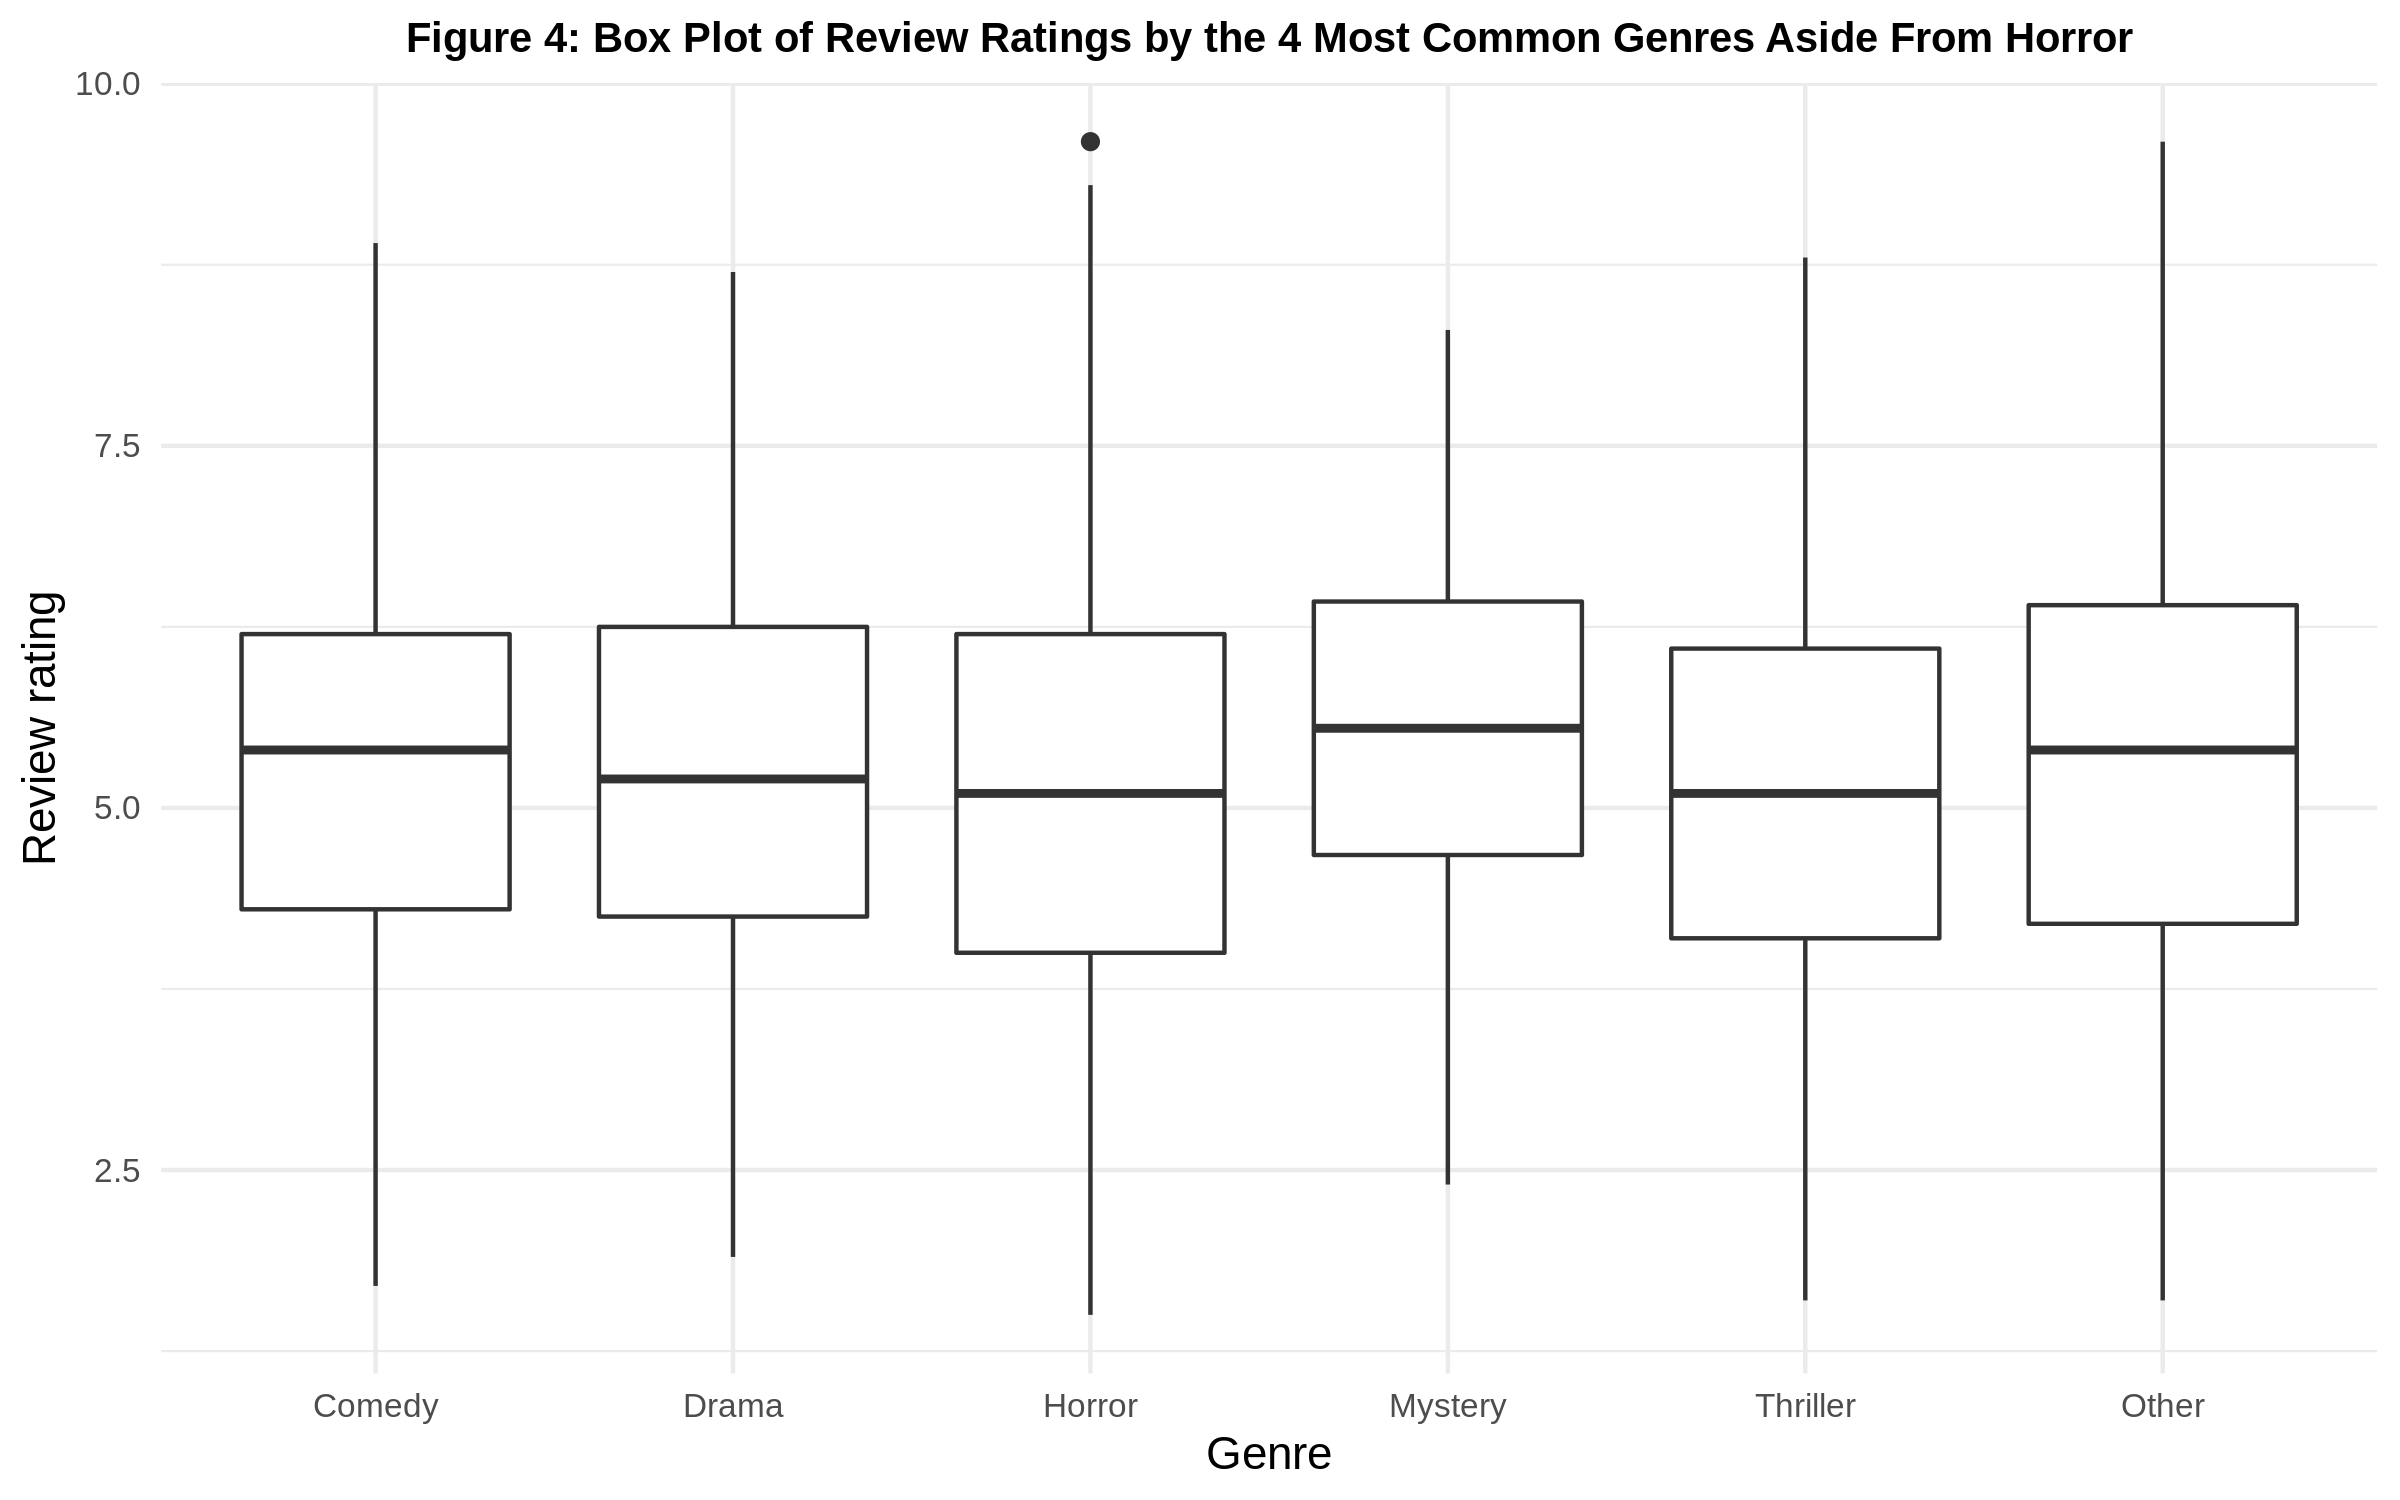

In [36]:
options(repr.plot.res=300, repr.plot.width = 8, repr.plot.height = 5)
hm_data_long %>%
  ggplot(aes(x = genre, y = review_rating)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Figure 4: Box Plot of Review Ratings by the 4 Most Common Genres Aside From Horror",
       x = "Genre",
       y = "Review rating") +
  theme(axis.text = element_text(size = 8, hjust = 0.5),
        plot.title = element_text(size = 10, hjust = 0.5, face = "bold"))

Note the horror box plot can be used as a reference because all movies in the data set are summarized by the horror box plot (as they are all considered horror).